In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from preprocessing import *

In [2]:
# Loading Data
data_raw = pd.read_csv('/Users/JasonLebov_1/Desktop/CS 470/Final Project/mxmh_survey_results.csv')

In [3]:
# Step 1: Dropping Features/Samples
    # Features
cols_drop = ['Permissions', 'Music effects', 'Timestamp', 'BPM']
drop_features = drop_irreleveant(data_raw, cols_drop)

    # Samples --> w/ NaN


In [4]:
# Step 2: Convert Mental Illness Scores to Categorical
features_range = ['Anxiety', 'Depression', 'OCD', 'Insomnia']
data_ranged = convert_ranges(drop_features, features_range)

In [5]:
# Step 3: One Hot Encode Features
cols_dummy = ["Primary streaming service", "Fav genre"]
one_hot_df = one_hot_encode(data_ranged, cols_dummy)

In [6]:
# Step 4: Label Encoding Features
encode_features_binary = ["While working" , "Instrumentalist", "Composer", "Exploratory", "Foreign languages"]
binary_options = ['No', 'Yes']
label_encoded_df = label_encode(one_hot_df, encode_features_binary, binary_options)

ValueError: y contains previously unseen labels: 'nan'

In [ ]:
encode_feature_cat = ["Frequency [Classical]", "Frequency [Country]", "Frequency [EDM]", "Frequency [Folk]", 'Frequency [Gospel]', 
                   "Frequency [Hip hop]", "Frequency [Jazz]", "Frequency [K pop]", "Frequency [Latin]", "Frequency [Lofi]", "Frequency [Metal]", "Frequency [Pop]","Frequency [R&B]", "Frequency [Rap]",'Frequency [Rock]', 
                   'Frequency [Video game music]']
cat_otions = []

In [7]:
# Move Label's to End of DF
cols = ['Anxiety', 'Depression', 'OCD', 'Insomnia']
numeric_df_final = label_end(label_encoded_df, cols)

In [8]:
# Step 5: Pearson Correlation Matrix - Features
cols_left_out = ['Anxiety', 'OCD', 'Insomnia', 'Depression']
feature_isolate = numeric_df_final.drop(columns=cols_left_out, axis=1)
feature_corr = pearson_matrix(feature_isolate)
rounded_matrix = feature_corr.round(2)

In [9]:
# Step 5 [cont]: Dropping Highly Correlated Features --> Threshold (delta) = 0.5
delta_val = 0.5
corr_feature_drop = pearson_drop_delta(numeric_df_final, rounded_matrix, 0.5)

['Frequency [R&B]', 'Frequency [Hip hop]', 'Frequency [Metal]', 'Fav genre_Metal']
['Frequency [R&B]', 'Frequency [Hip hop]', 'Fav genre_Metal', 'Frequency [Metal]']


In [10]:
corr_feature_drop.head()

,Age,Hours per day,While working,Instrumentalist,Composer,Exploratory,Foreign languages,BPM,Frequency [Classical],Frequency [Country],...,Fav genre_Lofi,Fav genre_Pop,Fav genre_R&B,Fav genre_Rap,Fav genre_Rock,Fav genre_Video game music,Anxiety,Depression,OCD,Insomnia
0,18.0,3.0,1,1,1,1,1,156.0,1,0,...,0,0,0,0,0,0,Symptoms_Mild,Symptoms_None,Symptoms_None,Symptoms_None
1,63.0,1.5,1,0,0,1,0,119.0,2,0,...,0,0,0,0,1,0,Symptoms_Moderate,Symptoms_Mild,Symptoms_None,Symptoms_Mild
2,18.0,4.0,0,0,0,0,1,132.0,0,0,...,0,0,0,0,0,1,Symptoms_Moderate,Symptoms_Moderate,Symptoms_Mild,Symptoms_Severe
3,61.0,2.5,1,0,1,1,1,84.0,2,0,...,0,0,0,0,0,0,Symptoms_Severe,Symptoms_Moderate,Symptoms_Mild,Symptoms_Mild
4,18.0,4.0,1,0,0,1,0,107.0,0,0,...,0,0,1,0,0,0,Symptoms_Moderate,Symptoms_Mild,Symptoms_Severe,Symptoms_Moderate


In [11]:
# Step 6: Creating 4 Datasets, for Each Illness
anxiety_df = corr_feature_drop.drop(columns=['Depression', 'OCD', 'Insomnia'], axis=1)
depression_df = corr_feature_drop.drop(columns=['Anxiety', 'OCD', 'Insomnia'], axis=1)
ocd_df = corr_feature_drop.drop(columns=['Anxiety', 'Depression', 'Insomnia'], axis=1)
insomnia_df = corr_feature_drop.drop(columns=['Anxiety', 'Depression', 'OCD'], axis=1)

In [16]:
# Step 6 [cont]: Removing 'Symptoms_' Prefix from Label Column
anxiety_df = remove_prefix(anxiety_df, 'Anxiety')
depression_df = remove_prefix(depression_df, 'Depression')
ocd_df = remove_prefix(ocd_df, 'OCD')
insomnia_df = remove_prefix(insomnia_df, 'Insomnia')

In [22]:
anxiety_df['Anxiety'].value_counts()

Anxiety
Moderate    264
Severe      239
Mild        169
None         64
Name: count, dtype: int64

In [23]:
# Step 7: Label Encode Label Options
anxiety_encoded = label_encode(anxiety_df, ['Anxiety'])

In [25]:
anxiety_encoded['Anxiety'].value_counts()

Anxiety
1    264
3    239
0    169
2     64
Name: count, dtype: int64

In [20]:
# Step 8: Rerun of Pearson Correlation for Labels

    # Anxiety
anxiety_corr = pearson_matrix(anxiety_df)

ValueError: could not convert string to float: 'Mild'

<Axes: title={'center': 'Pearson Correlation Matrix of Features'}>

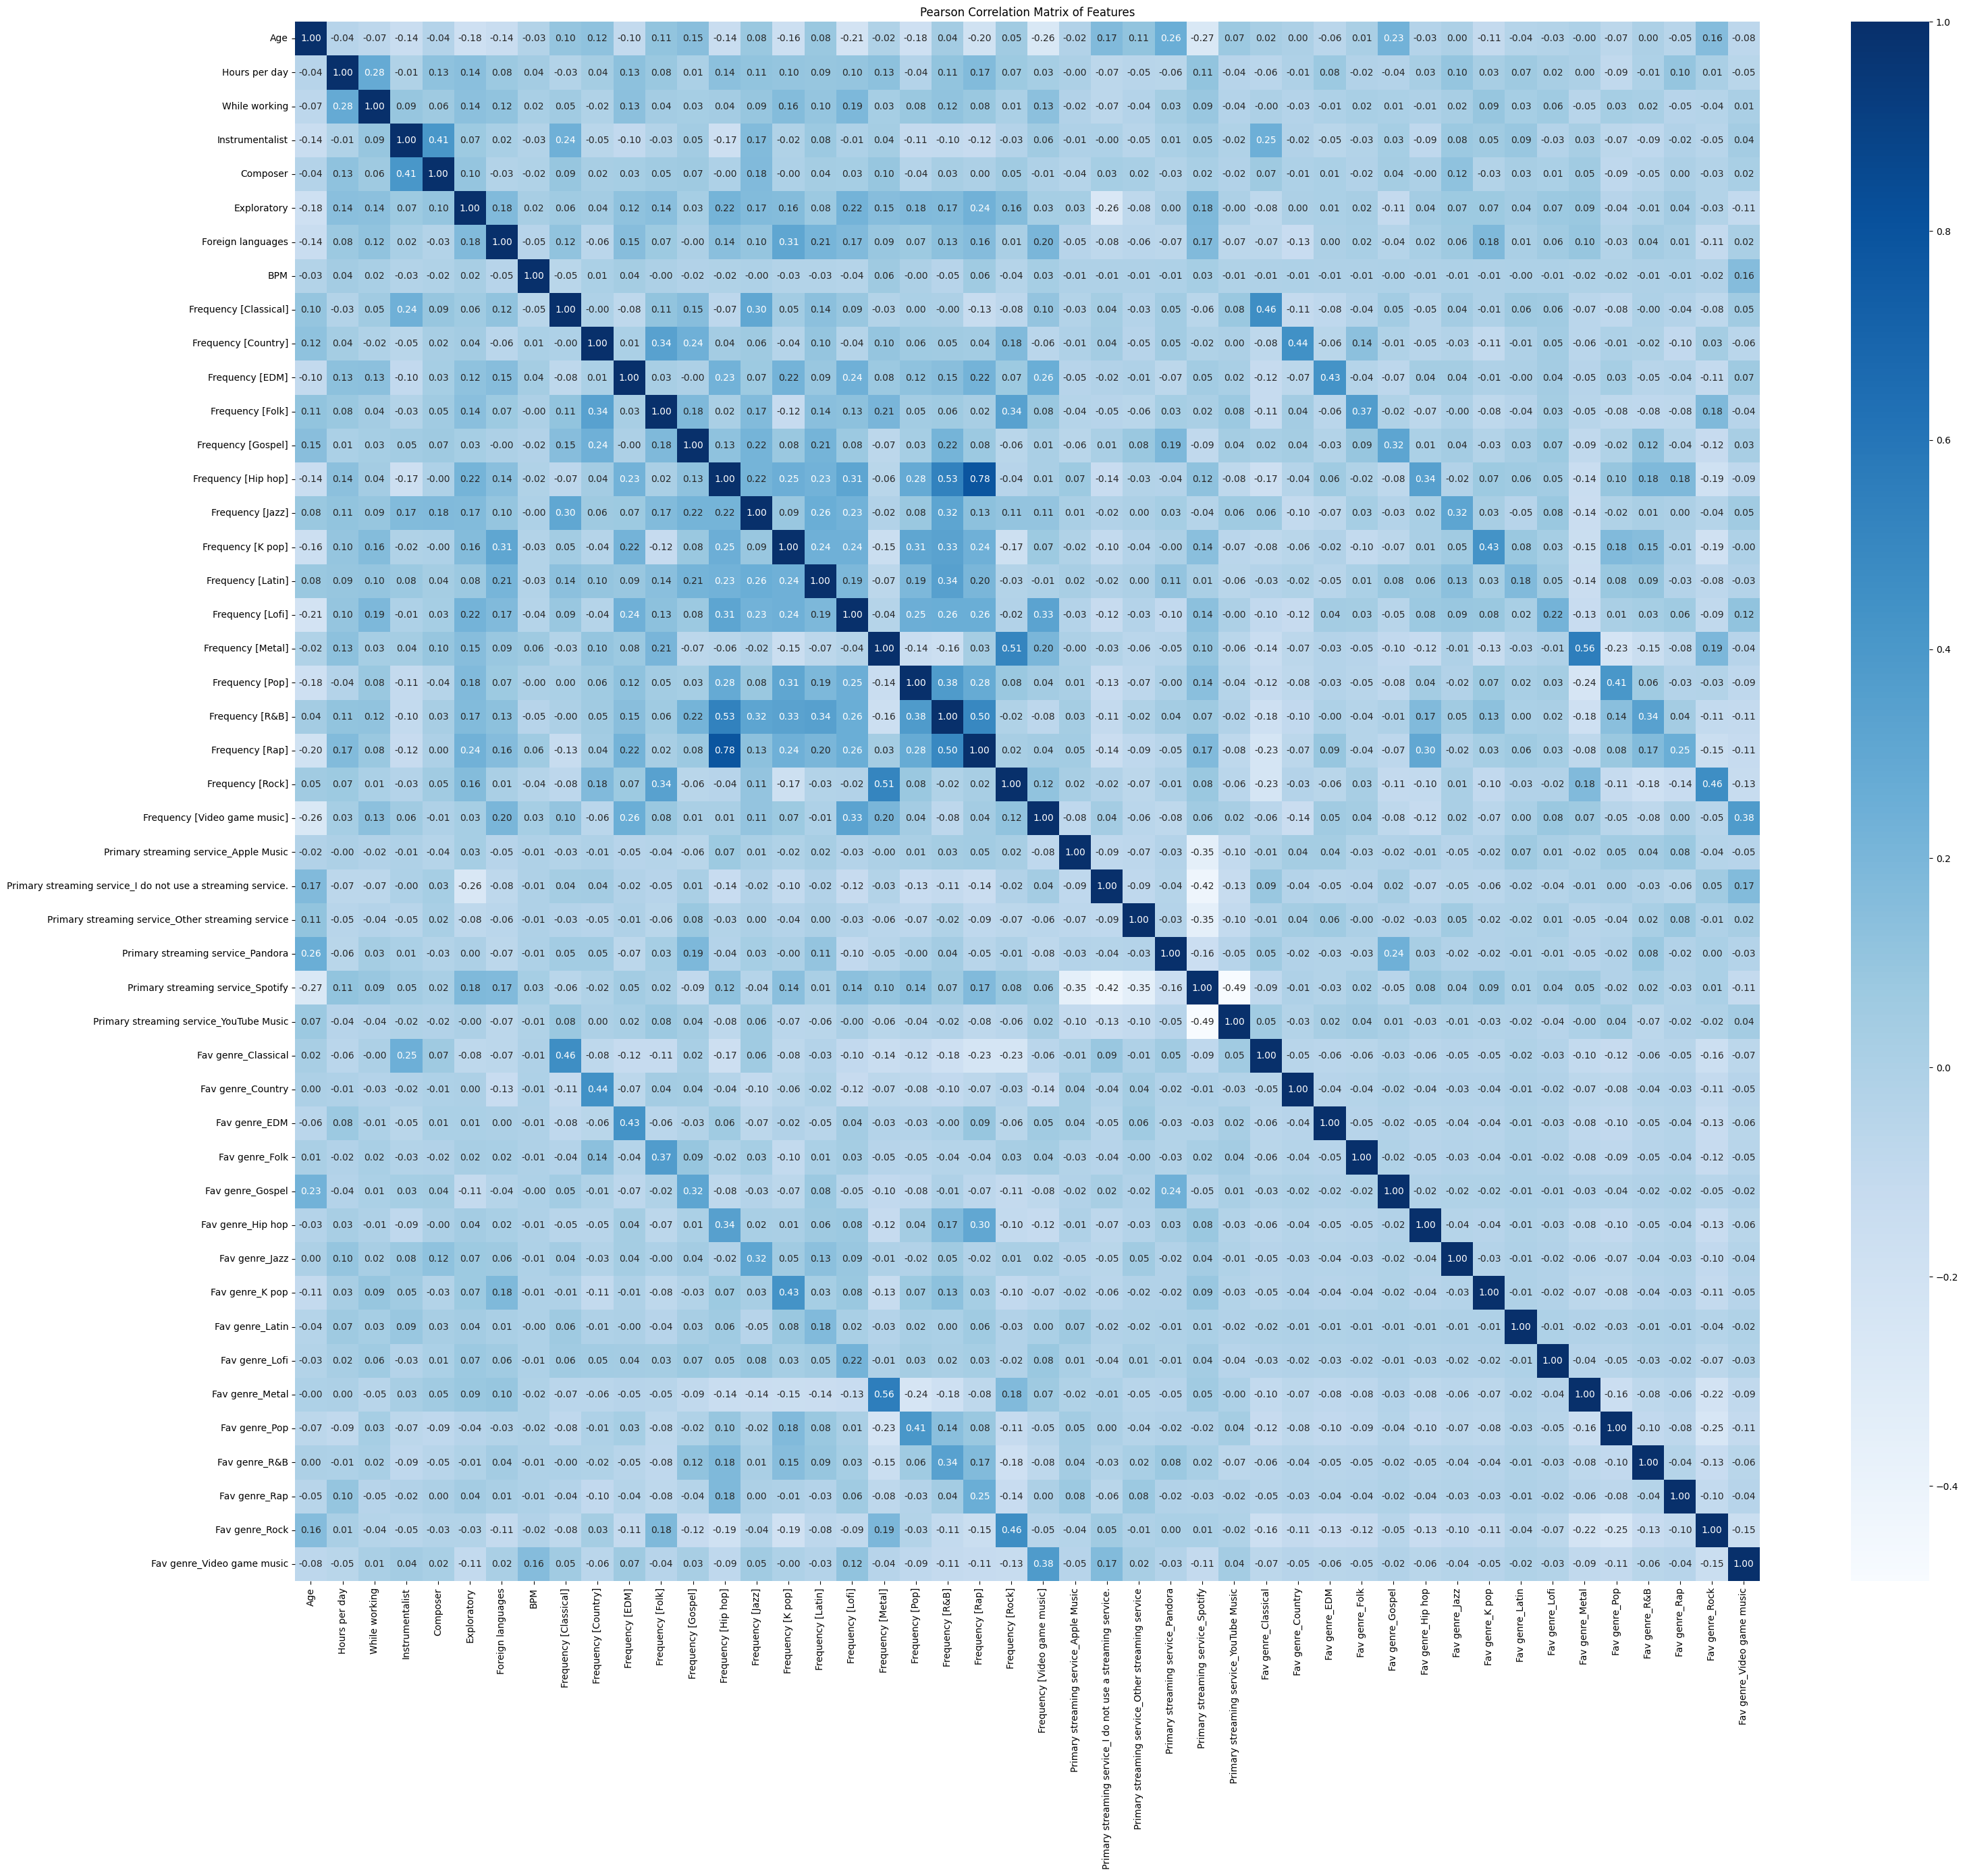

In [21]:
plt.figure(figsize=(35,30)) # 35, 30
plt.title('Pearson Correlation Matrix of Features')
sns.heatmap(anxiety_corr, annot=True, cmap=plt.cm.Blues, fmt='.2f')

In [10]:
# Min-Max Scaling --> Numeric Features (Only on Training Data)


Visualizations

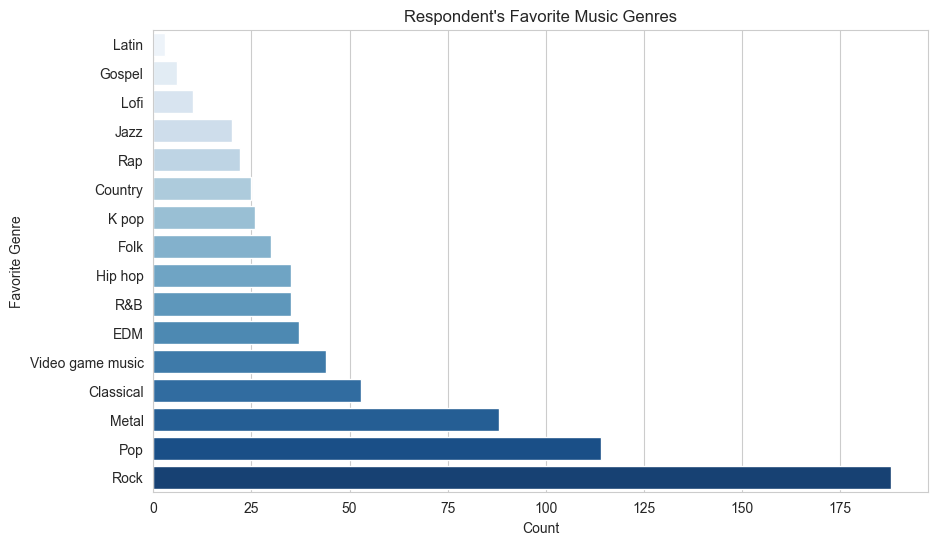

In [46]:
# Distribution of Favorite Genre

fav_genre_df = (data_raw.groupby("Fav genre")
                      .agg(count = ('Fav genre','count')).sort_values(by='count', ascending=True))
fav_genre_df.reset_index(inplace=True)

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=fav_genre_df['count'], y=fav_genre_df['Fav genre'], palette="Blues")
plt.xlabel('Count')
plt.ylabel('Favorite Genre')
plt.title('Respondent\'s Favorite Music Genres')
plt.show()

In [76]:
# Distribution of Musical Genre Frequency Listening
val_count_dict = {}

cols = ["Frequency [Classical]", "Frequency [Country]", "Frequency [EDM]", "Frequency [Folk]", 'Frequency [Gospel]', "Frequency [Hip hop]", "Frequency [Jazz]", "Frequency [K pop]", "Frequency [Latin]", "Frequency [Lofi]", "Frequency [Metal]", "Frequency [Pop]","Frequency [R&B]", "Frequency [Rap]",'Frequency [Rock]', 'Frequency [Video game music]']
col_label = ['Classical', 'Country', 'EDM', 'Folk', 'Gospel', 'Hip Hop', 'Jazz', 'K Pop', 'Latin', 'Lofi', 'Metal', 'Pop', 'R&B', 'Rap', 'Rock', 'Video Game Music']
value_order = ['Never', 'Rarely', 'Sometimes', 'Very frequently']

for val in cols:
    count = data_raw[val].value_counts()
    val_count_dict[val] = count

count_df = pd.concat(val_count_dict, axis=1)
count_df.columns = col_label
count_df = count_df.reindex(value_order)
final_count = count_df.transpose()

In [78]:
final_count

,Never,Rarely,Sometimes,Very frequently
Classical,169,259,200,108
Country,343,233,111,49
EDM,307,194,146,89
Folk,292,221,145,78
Gospel,535,135,52,14
Hip Hop,181,214,218,123
Jazz,261,247,175,53
K Pop,416,176,67,77
Latin,443,172,88,33
Lofi,280,211,160,85


In [ ]:
# Graph Distribution of Mental Illness for Frequency Ranges

<Axes: title={'center': 'Pearson Correlation Matrix of Features'}>

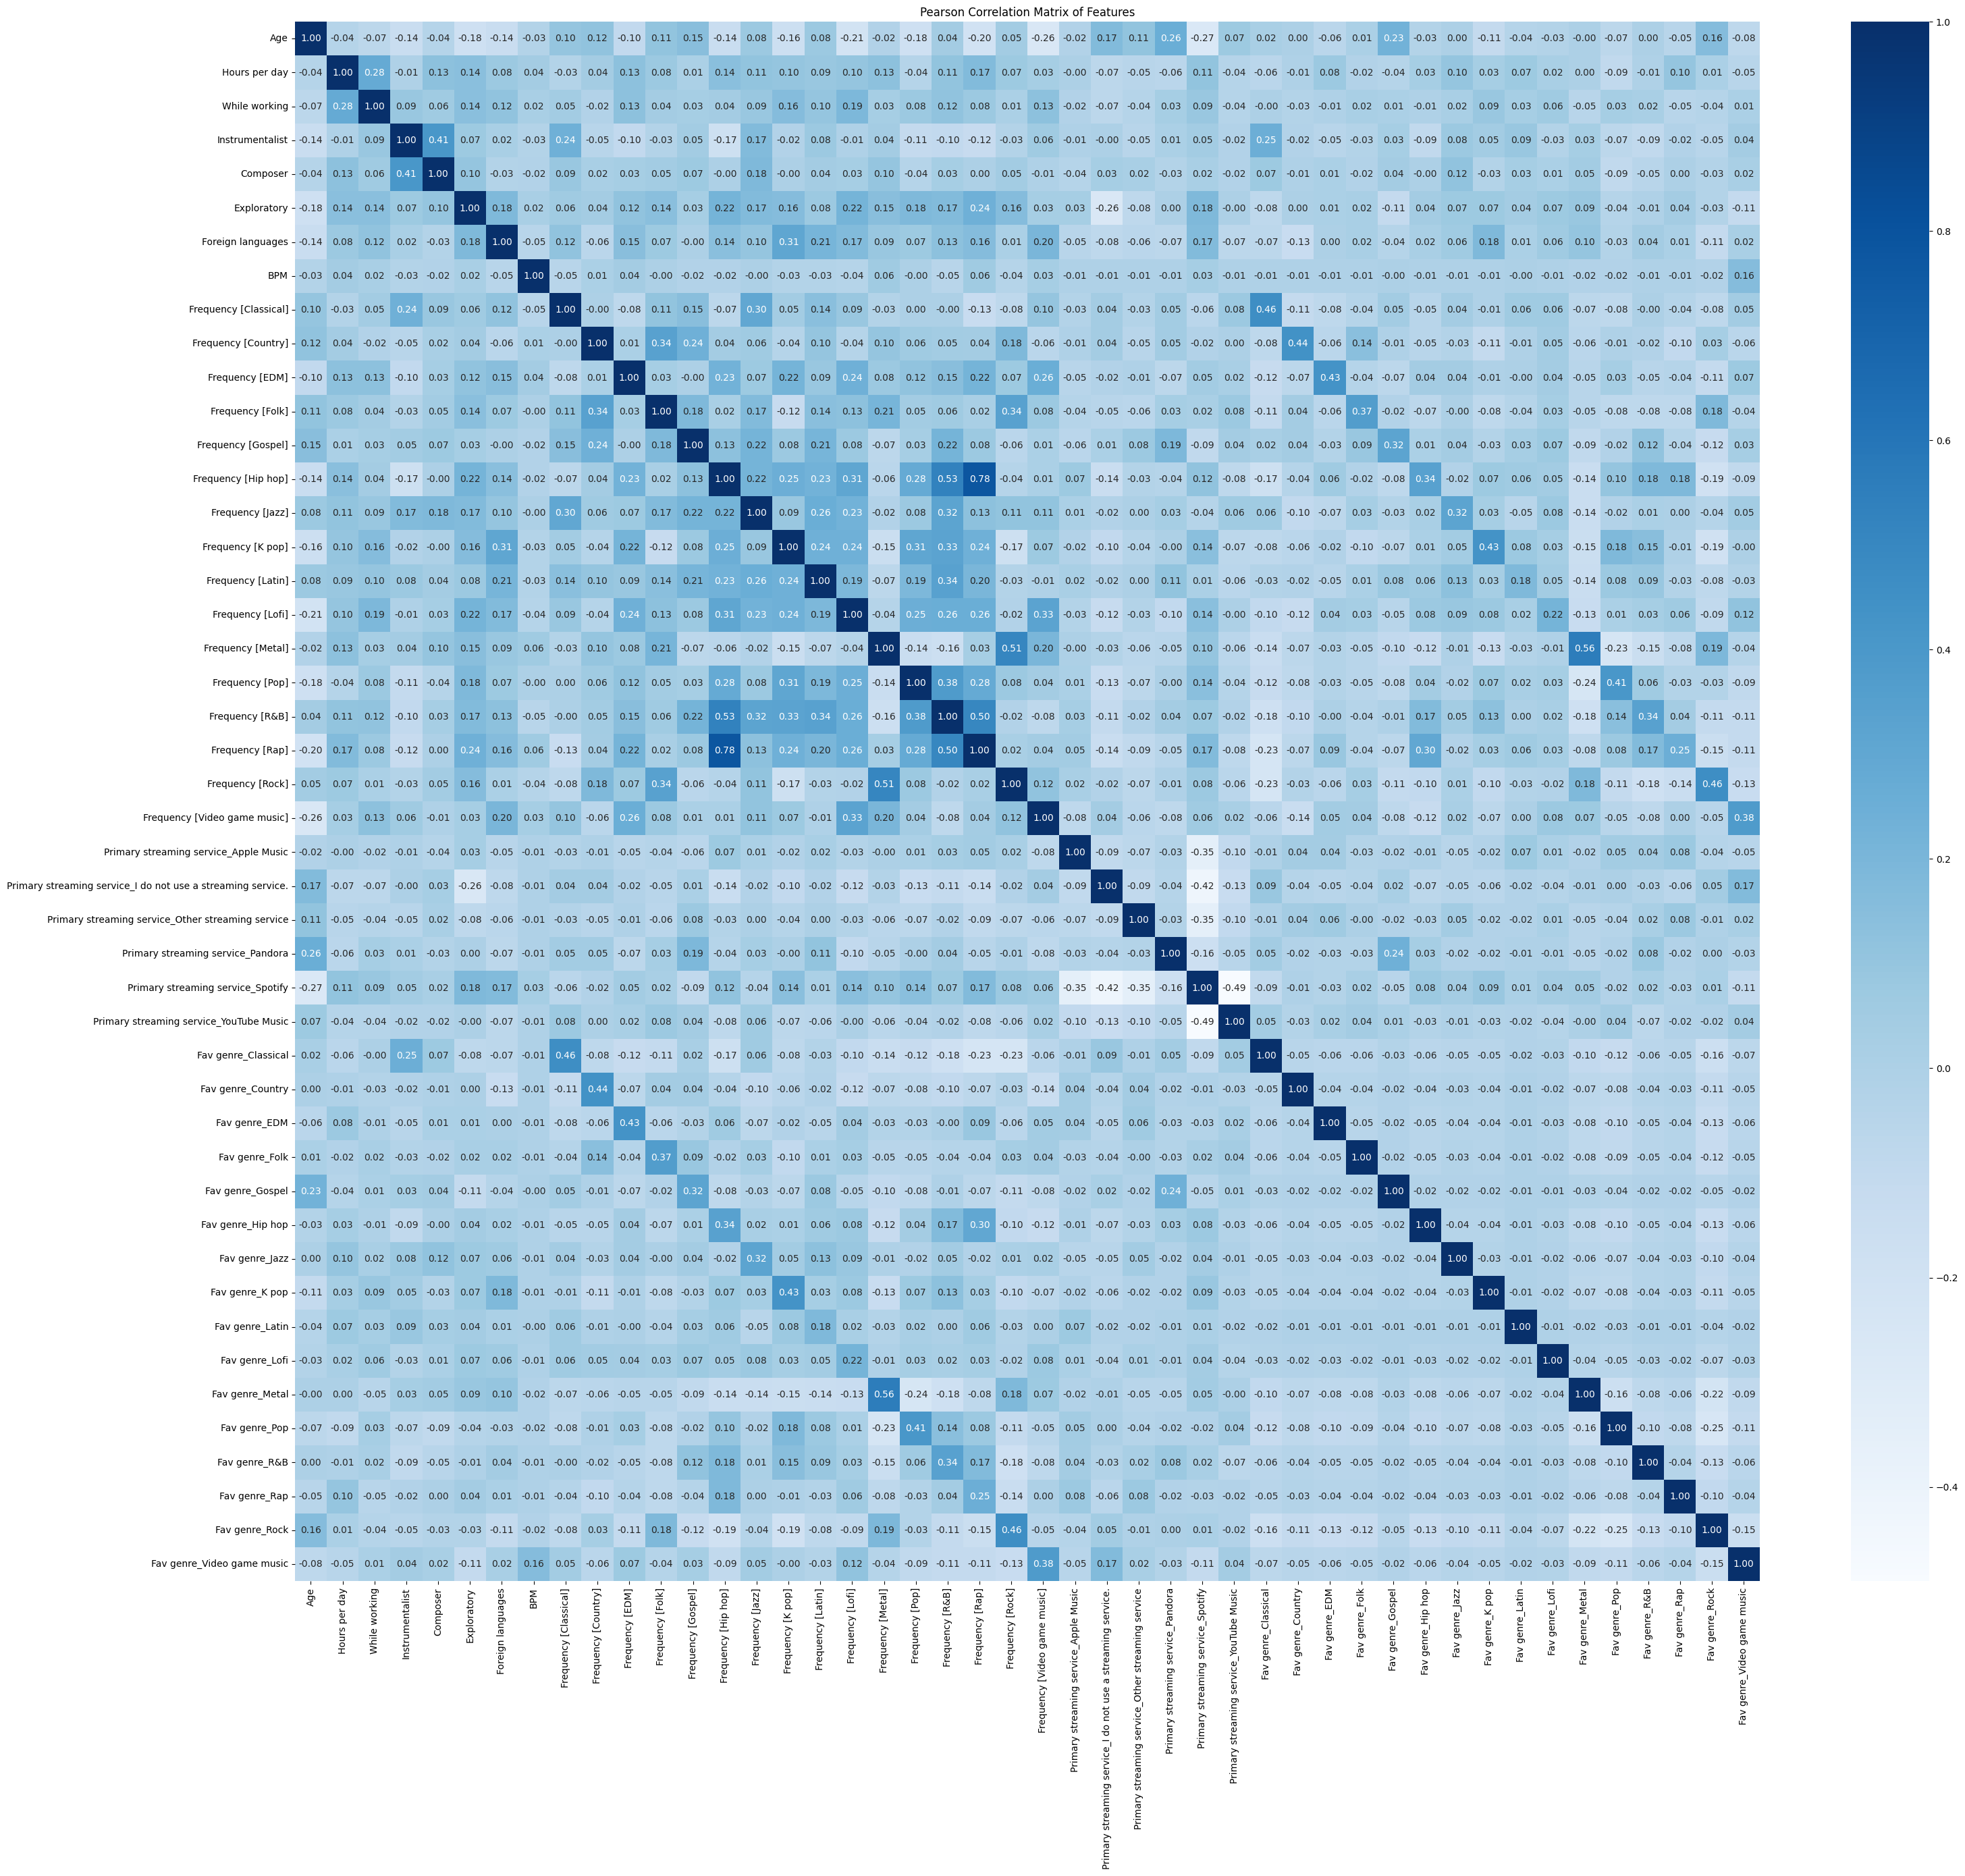

In [9]:
# Graph of Pearson Correlation Matrices - Features
plt.figure(figsize=(35,30)) # 35, 30
plt.title('Pearson Correlation Matrix of Features')
sns.heatmap(rounded_matrix, annot=True, cmap=plt.cm.Blues, fmt='.2f')

In [ ]:
# Graph of Pearson Correlation Matrices - Labels